# feature engineering

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')
y_test = pd.read_csv('data/y_test.csv', index_col='id')

In [4]:
df = X_train.merge(y_train, on='id')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 73454 to 15434
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_height         40095 non-null  int64  
 1   longitude          40095 non-null  float64
 2   latitude           40095 non-null  float64
 3   basin              40095 non-null  object 
 4   region             40095 non-null  object 
 5   district_code      40095 non-null  int64  
 6   population         40095 non-null  int64  
 7   public_meeting     37825 non-null  object 
 8   scheme_management  37501 non-null  object 
 9   permit             38005 non-null  object 
 10  construction_year  40095 non-null  int64  
 11  extraction_type    40095 non-null  object 
 12  management         40095 non-null  object 
 13  payment            40095 non-null  object 
 14  water_quality      40095 non-null  object 
 15  quantity           40095 non-null  object 
 16  source            

### converting some categorical features represented as strings from our initial dataset into ternary values to be able to build additional features. 

In [7]:
tern_water_quality = {'soft':0,
                      'salty':1,
                      'unknown': 2,
                      'milky': 3,
                      'coloured':4,
                      'salty abandoned': 5, 
                      'fluoride': 6,
                      'fluoride abandoned': 7
}

tern_region = {'Iringa':0,
               'Shinyanga':1,
               'Mbeya':2,
               'Kilimanjaro':3,
               'Morogoro':4,
               'Arusha':5,
               'Kagera':6,
               'Mwanza':7,
               'Kigoma':8,
               'Ruvuma':9,
               'Pwani':10,
               'Tanga':11,
               'Dodoma':12,
               'Singida':13,
               'Mara':14,
               'Tabora':15,
               'Rukwa':16,
               'Mtwara':17,
               'Manyara':18,
               'Lindi':19,
               'Dar es Salaam':20                                     
}

tern_extraction_type = {'gravity':0,
                        'nira/tanira':1,
                        'other':2,
                        'submersible':3,
                        'swn 80':4,
                        'mono':5,
                        'india mark ii':6,
                        'afridev':7,
                        'ksb':8,
                        'other - rope pump':9,
                        'other - swn 81':10,
                        'windmill':11,
                        'india mark iii':12,
                        'cemo':13,
                        'other - play pump':14,
                        'walimi':15,
                        'climax':16,
                        'other - mkulima/shinyanga':17
}

tern_waterpoint_type = {'communal standpipe':0,
'hand pump':1,
'other':2,
'communal standpipe multiple':3,
'improved spring':4,
'cattle trough':5,
'dam':6
}

tern_source = { 'spring':0,
                'shallow well':1,
                'machine dbh':2,
                'river':3,
                'rainwater harvesting':4,
                'hand dtw':5,
                'lake':6,
                'dam':7,
                'other':8,
                'unknown':9
}

tern_scheme_management = {'VWC':0,
                          'WUG':1,
                          'Water authority':2,
                          'WUA':3,
                          'Water Board':4,
                          'Parastatal':5,
                          'Private operator':6,
                          'Company':7,
                          'Other':8,
                          'SWC':9,
                          'Trust':10,
                          'None':11
}

### creating some additional features as bivariate combinations which could be impactful for our modelling process

In [8]:
df.water_quality = [tern_water_quality[x] for x in df.water_quality]

In [9]:
df.region = [tern_region[x] for x in df.region]

In [10]:
df.extraction_type = [tern_extraction_type[x] for x in df.extraction_type]

In [11]:
df.waterpoint_type = [tern_waterpoint_type[x] for x in df.waterpoint_type]

In [12]:
df.source = [tern_source[x] for x in df.source]

### adding these new features to our dataframe

In [13]:
df['water_quality_by_region'] = df.water_quality * df.region
df['water_quality_by_extraction_type'] = df.water_quality * df.extraction_type
df['water_quality_by_waterpoint_type'] = df.water_quality * df.waterpoint_type
df['water_quality_by_source'] = df.water_quality * df.source
df['water_quality_by_gps_height'] = df.water_quality * df.gps_height

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 73454 to 15434
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gps_height                        40095 non-null  int64  
 1   longitude                         40095 non-null  float64
 2   latitude                          40095 non-null  float64
 3   basin                             40095 non-null  object 
 4   region                            40095 non-null  int64  
 5   district_code                     40095 non-null  int64  
 6   population                        40095 non-null  int64  
 7   public_meeting                    37825 non-null  object 
 8   scheme_management                 37501 non-null  object 
 9   permit                            38005 non-null  object 
 10  construction_year                 40095 non-null  int64  
 11  extraction_type                   40095 non-null  int64  
 12  

In [15]:
cols_to_drop = ['water_quality',
                'region',
                'extraction_type',
                'waterpoint_type',
                'source',
                'gps_height'
]
df = df.drop(cols_to_drop, axis = 1)
df = df.fillna('missing', axis = 1)

In [16]:
df.columns

Index(['longitude', 'latitude', 'basin', 'district_code', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'management', 'payment', 'quantity', 'status_group',
       'water_quality_by_region', 'water_quality_by_extraction_type',
       'water_quality_by_waterpoint_type', 'water_quality_by_source',
       'water_quality_by_gps_height'],
      dtype='object')

In [ ]:
X_train.to_csv('data/X_train_eng.csv')
X_test.to_csv('data/X_test_eng.csv')
y_train.to_csv('data/y_train_eng.csv')
y_test.to_csv('data/y_test_eng.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 73454 to 15434
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   longitude                         40095 non-null  float64
 1   latitude                          40095 non-null  float64
 2   basin                             40095 non-null  object 
 3   district_code                     40095 non-null  int64  
 4   population                        40095 non-null  int64  
 5   public_meeting                    40095 non-null  object 
 6   scheme_management                 40095 non-null  object 
 7   permit                            40095 non-null  object 
 8   construction_year                 40095 non-null  int64  
 9   management                        40095 non-null  object 
 10  payment                           40095 non-null  object 
 11  quantity                          40095 non-null  object 
 12  

### baseline dummy model after feature engineering

In [27]:
X_train_eng = pd.read_csv('data/X_train_eng.csv', index_col='id')
X_test_eng = pd.read_csv('data/X_test_eng.csv', index_col='id')
y_train_eng = pd.read_csv('data/y_train_eng.csv', index_col='id')
y_test_eng = pd.read_csv('data/y_test_eng.csv', index_col='id')

In [28]:
eng_dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
eng_dummy_model.fit(X_train_eng, y_train_eng)

DummyClassifier(random_state=42, strategy='most_frequent')

In [29]:
print('Accuracy Score Train:', eng_dummy_model.score(X_train_eng, y_train_eng))
print('Accuracy Score Test:', eng_dummy_model.score(X_test_eng, y_test_eng))

Accuracy Score Train: 0.5423120089786756
Accuracy Score Test: 0.5423120089786756


In [30]:
log_loss_eng_dummy = cross_val_score(eng_dummy_model, X_train_eng, y_train_eng, scoring='neg_log_loss')
log_loss_eng_dummy = -log_loss_eng_dummy.mean()
print('Log Loss:', log_loss_eng_dummy)

Log Loss: 15.80798318052141


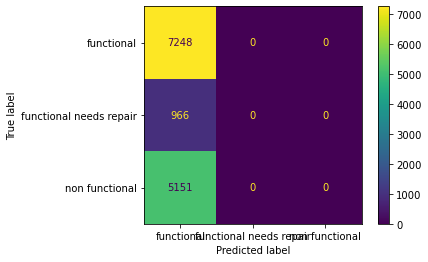

In [31]:
plot_confusion_matrix(eng_dummy_model, X_test_eng, y_test_eng);

In [32]:
y_pred_eng = eng_dummy_model.predict(X_test_eng)
cm = confusion_matrix(y_test_eng, y_pred_eng)
func = cm[0][0] / (cm[0][0] + cm[0][1] + cm[0][2])
func_nr = cm[1][1] / (cm[1][0] + cm[1][1] + cm[1][2])
non_func = cm[2][2] / (cm[2][0] + cm[2][1] + cm[2][2])
print(f'The model correctly predicts {round(func*100, 2)}% of the funtional wells.')
print(f'The model correctly predicts {round(func_nr*100, 2)}% of the funtional-needs-repair wells.')
print(f'The model correctly predicts {round(non_func*100, 2)}% of the non-functional wells.')

The model correctly predicts 100.0% of the funtional wells.
The model correctly predicts 0.0% of the funtional-needs-repair wells.
The model correctly predicts 0.0% of the non-functional wells.
